In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import missingno as msno

## 자료 형태 파악

In [3]:
prop16 = pd.read_csv("properties_2016.csv")
train16= pd.read_csv("train_2016_v2.csv")
prop17 = pd.read_csv("properties_2017.csv")
train17= pd.read_csv("train_2017.csv")
submission = pd.read_csv("sample_submission.csv")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
# 원본 파일 백업
# prop16_bu = prop16
# train16_bu = train16
# prop17_bu = prop17
# train17_bu = train17
# submission_bu = submission

In [42]:
train16_bu.shape, train17_bu.shape, prop16_bu.shape, prop17_bu.shape, submission_bu.shape

((90275, 4), (77613, 3), (2985217, 58), (2985217, 58), (2985217, 7))

In [15]:
# 백업 파일을 불러오기
# prop16 = prop16_bu
# train16 = train16_bu
# prop17 = prop17_bu
# train17 = train17_bu
# submission = submission_bu

In [16]:
train16.shape, train17.shape, prop16.shape, prop17.shape, submission.shape

((90275, 3), (77613, 3), (2985217, 58), (2985217, 58), (2985217, 7))

In [17]:
prop16.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [18]:
prop17.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


In [19]:
train16.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [20]:
train17.head()

,parcelid,logerror,transactiondate
0,14297519,0.025595,2017-01-01
1,17052889,0.055619,2017-01-01
2,14186244,0.005383,2017-01-01
3,12177905,-0.103410,2017-01-01
4,10887214,0.006940,2017-01-01


In [21]:
submission.head()

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0,0,0,0,0,0
1,10759547,0,0,0,0,0,0
2,10843547,0,0,0,0,0,0
3,10859147,0,0,0,0,0,0
4,10879947,0,0,0,0,0,0


## prop16, prop17 동일 parcelid 비교

In [22]:
df = pd.DataFrame(columns=["2016_parcelid","2017_parcelid"])
df

,2016_parcelid,2017_parcelid


In [23]:
df["2016_parcelid"],df["2017_parcelid"] = prop16["parcelid"], prop17["parcelid"]
df.head(10)

,2016_parcelid,2017_parcelid
0,10754147,10754147
1,10759547,10759547
2,10843547,10843547
3,10859147,10859147
4,10879947,10879947
5,10898347,10898347
6,10933547,10933547
7,10940747,10940747
8,10954547,10954547
9,10976347,10976347


In [24]:
list_16_parcelid = df["2016_parcelid"].tolist()
list_17_parcelid = df["2017_parcelid"].tolist()

In [25]:
list_17_parcelid[:10]

[10754147,
 10759547,
 10843547,
 10859147,
 10879947,
 10898347,
 10933547,
 10940747,
 10954547,
 10976347]

In [26]:
len([i for i in list_16_parcelid[:1000] if i in list_17_parcelid[:3000]])

993

- 100% 동일한 것은 아니지만 사라지고 새로 생긴 소수의 parcelid가 있고 대부분 동일한 parcelid

# train_2016

## error - outlier 탐색

In [27]:
train16.tail()

,parcelid,logerror,transactiondate
90270,10774160,-0.0356,2016-12-30
90271,12046695,0.0070,2016-12-30
90272,12995401,-0.2679,2016-12-30
90273,11402105,0.0602,2016-12-30
90274,12566293,0.4207,2016-12-30


In [28]:
range(train16.shape[0])

range(0, 90275)

In [29]:
np.sort(train16.logerror.values)

array([-4.605, -4.605, -4.51 , ...,  4.445,  4.52 ,  4.737])

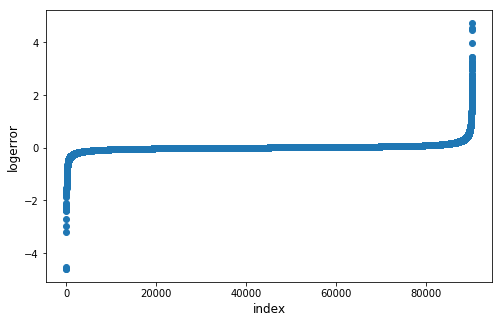

In [30]:
plt.figure(figsize=(8,5))
plt.scatter(range(train16.shape[0]), np.sort(train16.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

In [31]:
np.percentile(train16.logerror.values, 99)

0.4638819999999963

## transaction date

In [32]:
train16['transactiondate'] = pd.to_datetime(train16['transactiondate'])

In [33]:
train16.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [34]:
train16['transaction_month'] = train16['transactiondate'].dt.month

In [35]:
train16.tail()

,parcelid,logerror,transactiondate,transaction_month
90270,10774160,-0.0356,2016-12-30,12
90271,12046695,0.0070,2016-12-30,12
90272,12995401,-0.2679,2016-12-30,12
90273,11402105,0.0602,2016-12-30,12
90274,12566293,0.4207,2016-12-30,12


In [36]:
np.sort(train16['transaction_month'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

### month마다 transaction 수

In [37]:
# month 마다의 거래 수
train16['transaction_month'].value_counts()

6     10922
8     10476
5      9961
7      9947
9      9575
4      9311
3      8652
1      6556
2      6333
10     4977
11     1826
12     1739
Name: transaction_month, dtype: int64

In [38]:
train16.head()

,parcelid,logerror,transactiondate,transaction_month
0,11016594,0.0276,2016-01-01,1
1,14366692,-0.1684,2016-01-01,1
2,12098116,-0.0040,2016-01-01,1
3,12643413,0.0218,2016-01-02,1
4,14432541,-0.0050,2016-01-02,1


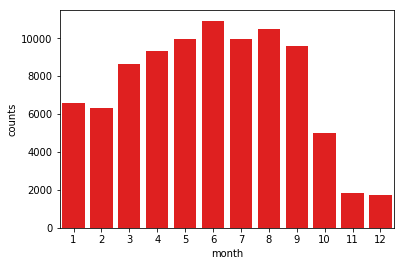

In [48]:
transaction_month = train16["transaction_month"].value_counts()
sns.barplot(transaction_month.index, transaction_month.values, color='red')
plt.xlabel('month')
plt.ylabel('counts')
plt.show()

### unique 하지 않은 parcelid

In [49]:
len(train16['parcelid']), len(train16['parcelid'].unique())

(90275, 90150)

In [50]:
train16['parcelid'].value_counts().head(10)

11842707    3
12613442    2
12032773    2
11729067    2
11845988    2
14753974    2
12779635    2
11188497    2
10883535    2
10790468    2
Name: parcelid, dtype: int64

In [51]:
# 겹치는 횟수, 그에 해당하는 갯수
train16['parcelid'].value_counts().reset_index()['parcelid'].value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

# properties 2016 - Missing Value

In [52]:
list_train16_parcelid= train16['parcelid'].tolist()
list_prop16_parcelid= prop16['parcelid'].tolist()

In [53]:
len(list_train16_parcelid)

90275

In [54]:
len(list_prop16_parcelid)

2985217

In [55]:
len([i for i in list_train16_parcelid[:500] if i in list_prop16_parcelid])

500

- train data의 parcelid는 모두 properties data의 parcelid에도 있다

### 2016 train, prop merge

In [56]:
merged = pd.merge(train16,prop16,on="parcelid",how="left")

In [57]:
merged.shape

(90275, 61)

In [58]:
merged.head()

,parcelid,logerror,transactiondate,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1,1.0,NaN,NaN,2.0,3.0,NaN,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,1,NaN,NaN,NaN,3.5,4.0,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1,1.0,NaN,NaN,3.0,2.0,NaN,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1,1.0,NaN,NaN,2.0,2.0,NaN,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,1,NaN,NaN,NaN,2.5,4.0,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [59]:
# merge 된 데이터프레임의 컬럼 및 컬럼 데이터타입
merged_dtype = merged.dtypes.reset_index()
merged_dtype.columns = ["column name","column type"]
merged_dtype.tail()

,column name,column type
56,landtaxvaluedollarcnt,float64
57,taxamount,float64
58,taxdelinquencyflag,object
59,taxdelinquencyyear,float64
60,censustractandblock,float64


In [60]:
merged_dtype.groupby("column type").aggregate('count').reset_index()

,column type,column name
0,int64,2
1,float64,53
2,datetime64[ns],1
3,object,5


In [61]:
merged_t = merged.transpose()

In [64]:
merged_t.shape

(61, 90275)

In [65]:
merged_t.tail()

,0,1,2,3,4,5,6,7,8,9,...,90265,90266,90267,90268,90269,90270,90271,90272,90273,90274
landtaxvaluedollarcnt,237416,239071,57912,73362,264977,1.5673e+06,46972,199000,143230,80983,...,160136,13027,120020,122915,263300,147200,43218,16088,32878,96779
taxamount,6735.88,10153,11484.5,3048.74,5488.96,27126.6,2304.97,3745.5,2172.88,1940.26,...,3075.18,6137.29,3172.68,5853.81,5311.03,2495.24,1886.54,1925.7,2285.57,2560.96
taxdelinquencyflag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
taxdelinquencyyear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN
censustractandblock,6.03711e+13,NaN,6.03746e+13,6.0373e+13,6.05904e+13,6.03762e+13,6.03754e+13,6.111e+13,6.05904e+13,6.05906e+13,...,6.0373e+13,6.03754e+13,6.111e+13,6.03754e+13,6.0374e+13,6.03713e+13,6.0373e+13,6.03743e+13,6.0376e+13,6.03754e+13


### Missing Value

In [66]:
# NaN 값이 하나라도 있는 columns
missingValueColumns = merged.columns[merged.isnull().any()].tolist()
len(missingValueColumns), missingValueColumns

(47,
 ['airconditioningtypeid',
  'architecturalstyletypeid',
  'basementsqft',
  'buildingclasstypeid',
  'buildingqualitytypeid',
  'calculatedbathnbr',
  'decktypeid',
  'finishedfloor1squarefeet',
  'calculatedfinishedsquarefeet',
  'finishedsquarefeet12',
  'finishedsquarefeet13',
  'finishedsquarefeet15',
  'finishedsquarefeet50',
  'finishedsquarefeet6',
  'fireplacecnt',
  'fullbathcnt',
  'garagecarcnt',
  'garagetotalsqft',
  'hashottuborspa',
  'heatingorsystemtypeid',
  'lotsizesquarefeet',
  'poolcnt',
  'poolsizesum',
  'pooltypeid10',
  'pooltypeid2',
  'pooltypeid7',
  'propertycountylandusecode',
  'propertyzoningdesc',
  'regionidcity',
  'regionidneighborhood',
  'regionidzip',
  'storytypeid',
  'threequarterbathnbr',
  'typeconstructiontypeid',
  'unitcnt',
  'yardbuildingsqft17',
  'yardbuildingsqft26',
  'yearbuilt',
  'numberofstories',
  'fireplaceflag',
  'structuretaxvaluedollarcnt',
  'taxvaluedollarcnt',
  'landtaxvaluedollarcnt',
  'taxamount',
  'taxdelin

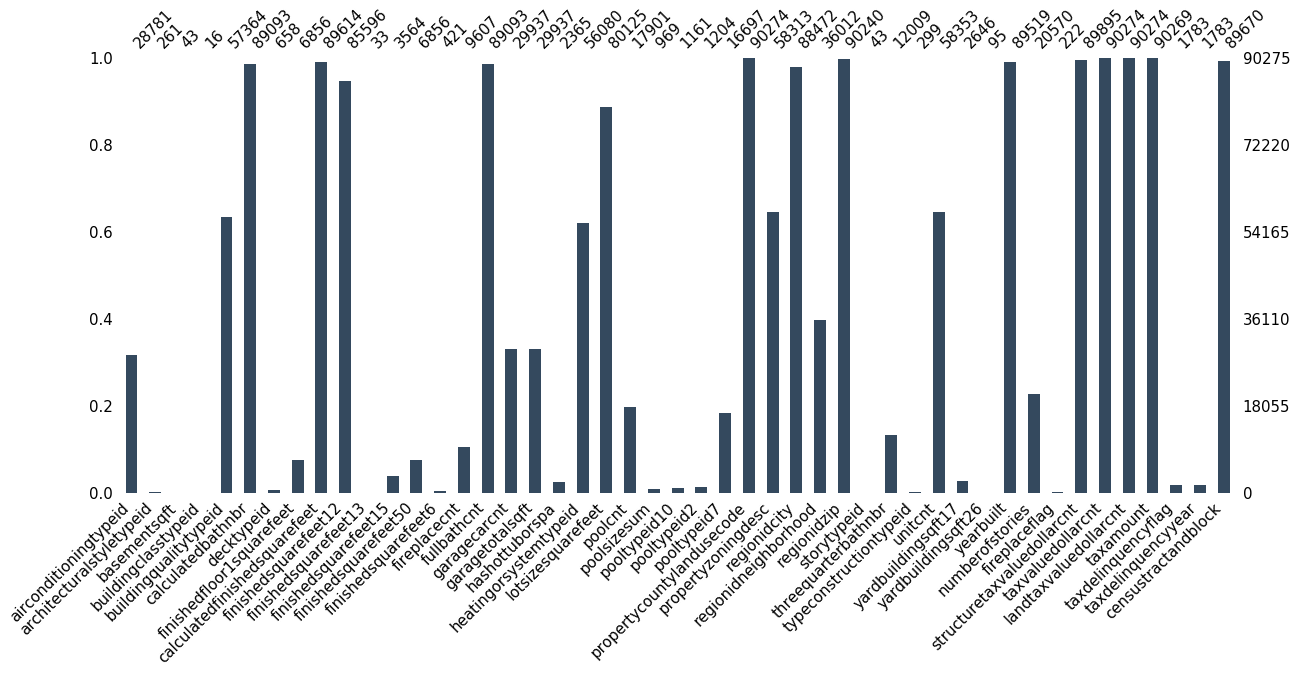

In [172]:
missingValueColumns = merged.columns[merged.isnull().any()].tolist()
msno.bar(merged[missingValueColumns],\
            figsize=(20,8),color="#34495e",fontsize=15,labels=True)
plt.show()

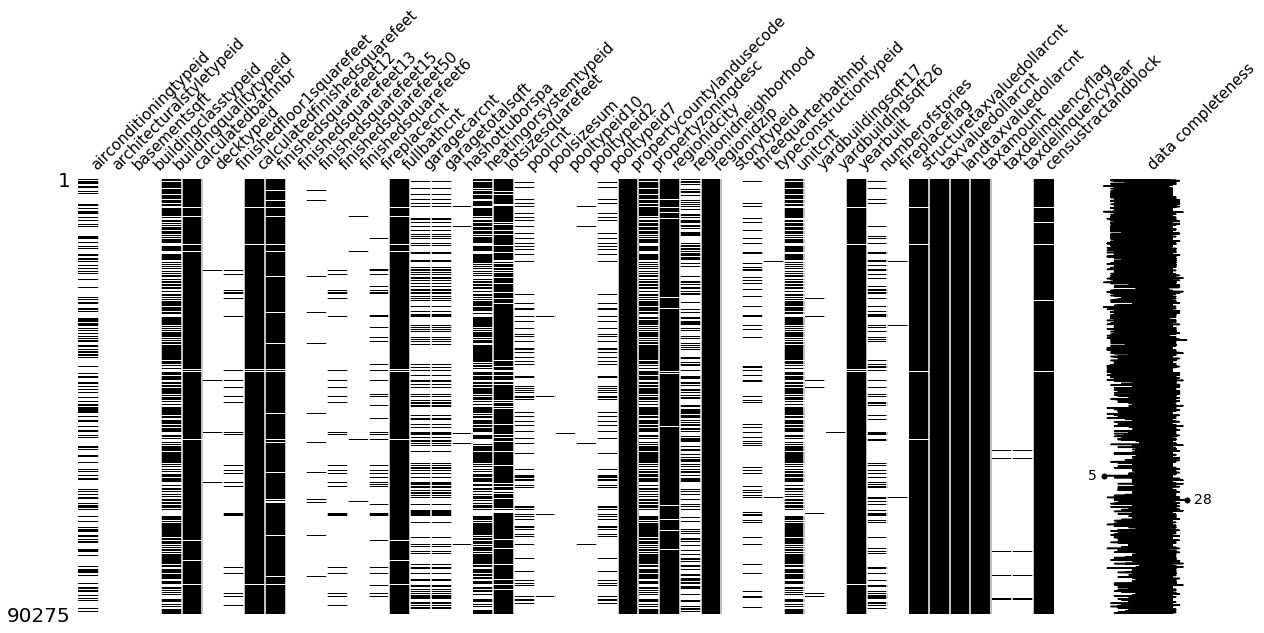

In [174]:
msno.matrix(merged[missingValueColumns],width_ratios=(10,1),figsize=(20,8)\
            ,color=(0,0, 0),fontsize=15,sparkline=True,labels=True)
plt.show()

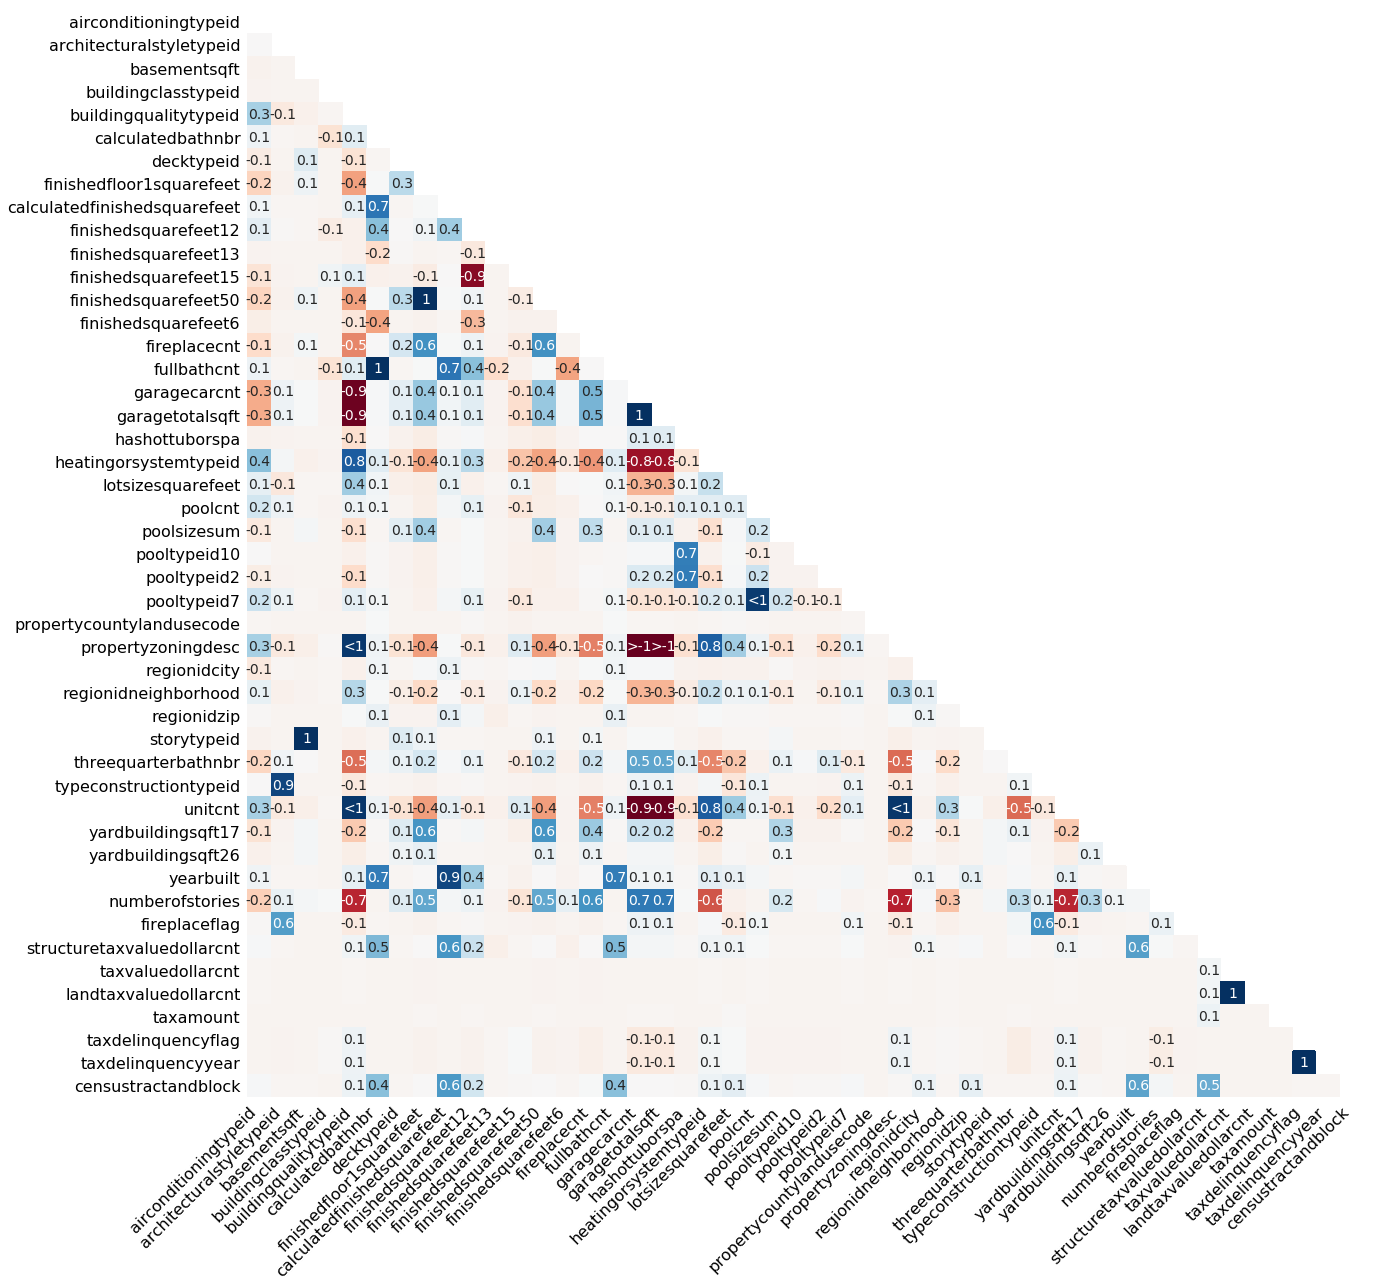

In [175]:
msno.heatmap(merged[missingValueColumns],figsize=(20,20))
plt.show()

In [67]:
merged_missing = merged.isnull().sum().reset_index()

In [68]:
merged_missing.head(8)

,index,0
0,parcelid,0
1,logerror,0
2,transactiondate,0
3,transaction_month,0
4,airconditioningtypeid,61494
5,architecturalstyletypeid,90014
6,basementsqft,90232
7,bathroomcnt,0


In [69]:
merged_missing.columns = ["columns","missing value counts"]

In [70]:
merged_missing.head(8)

,columns,missing value counts
0,parcelid,0
1,logerror,0
2,transactiondate,0
3,transaction_month,0
4,airconditioningtypeid,61494
5,architecturalstyletypeid,90014
6,basementsqft,90232
7,bathroomcnt,0


In [73]:
merged_missing["missing ratio"] = \
merged_missing["missing value counts"]/merged.shape[0]

In [74]:
merged_missing.head(8)

,columns,missing value counts,missing ratio
0,parcelid,0,0.000000
1,logerror,0,0.000000
2,transactiondate,0,0.000000
3,transaction_month,0,0.000000
4,airconditioningtypeid,61494,0.681185
5,architecturalstyletypeid,90014,0.997109
6,basementsqft,90232,0.999524
7,bathroomcnt,0,0.000000


In [73]:
pd.options.display.max_rows = 115

In [77]:
merged_missing.head(10)

,columns,missing value counts,missing ratio
0,parcelid,0,0.000000
1,logerror,0,0.000000
2,transactiondate,0,0.000000
3,transaction_month,0,0.000000
4,airconditioningtypeid,61494,0.681185
5,architecturalstyletypeid,90014,0.997109
6,basementsqft,90232,0.999524
7,bathroomcnt,0,0.000000
8,bedroomcnt,0,0.000000
9,buildingclasstypeid,90259,0.999823


In [258]:
merged_missing[merged_missing["missing ratio"]>0.9]

,columns,missing value counts,missing ratio
5,architecturalstyletypeid,90014,0.997109
6,basementsqft,90232,0.999524
9,buildingclasstypeid,90259,0.999823
12,decktypeid,89617,0.992711
13,finishedfloor1squarefeet,83419,0.924054
16,finishedsquarefeet13,90242,0.999634
17,finishedsquarefeet15,86711,0.960521
18,finishedsquarefeet50,83419,0.924054
19,finishedsquarefeet6,89854,0.995336
25,hashottuborspa,87910,0.973802


In [158]:
merged_missing[merged_missing["missing ratio"]<0.3]["columns"]

0                         parcelid
1                         logerror
2                  transactiondate
3                transaction_month
7                      bathroomcnt
8                       bedroomcnt
11               calculatedbathnbr
14    calculatedfinishedsquarefeet
15            finishedsquarefeet12
20                            fips
22                     fullbathcnt
27                        latitude
28                       longitude
29               lotsizesquarefeet
35       propertycountylandusecode
36           propertylandusetypeid
38          rawcensustractandblock
39                    regionidcity
40                  regionidcounty
42                     regionidzip
43                         roomcnt
50                       yearbuilt
53      structuretaxvaluedollarcnt
54               taxvaluedollarcnt
55                  assessmentyear
56           landtaxvaluedollarcnt
57                       taxamount
60             censustractandblock
Name: columns, dtype

In [87]:
merged_missing[merged_missing["missing ratio"]<0.3]['columns'].count()

28

In [88]:
len(merged_missing[merged_missing["missing ratio"]>0.8])

24

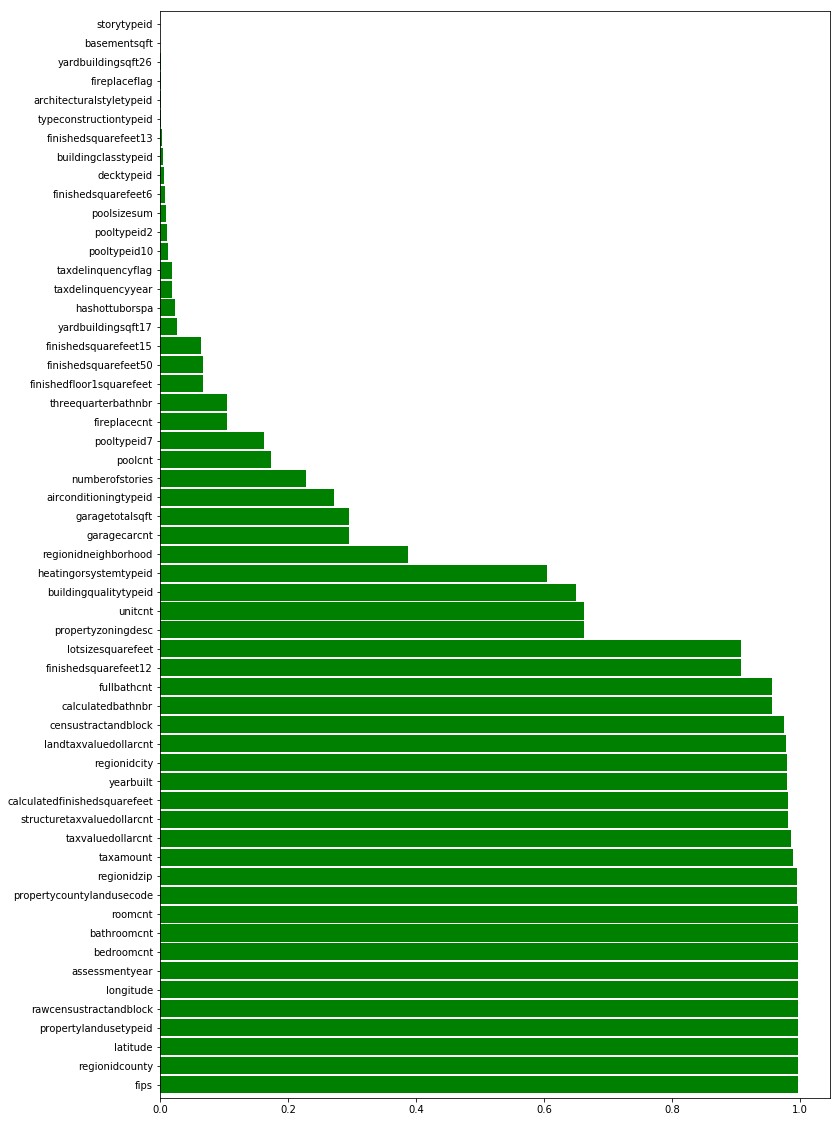

In [90]:
plt.figure(figsize=(12,20))
prop16.drop('parcelid',axis=1).notnull().mean()\
.sort_values(ascending = False).plot(kind = 'barh',color='green', width=0.9)
plt.show()

## MV 80% 이상 되는 컬럼들 탐색

In [80]:
np.dtype(prop16['poolcnt'])

dtype('float64')

In [81]:
prop16['poolcnt'].describe().reset_index()

,index,poolcnt
0,count,517534.0
1,mean,1.0
2,std,0.0
3,min,1.0
4,25%,1.0
5,50%,1.0
6,75%,1.0
7,max,1.0


In [82]:
prop16['poolsizesum'].describe().reset_index()

,index,poolsizesum
0,count,27960.000000
1,mean,519.710980
2,std,191.323284
3,min,19.000000
4,25%,430.000000
5,50%,495.000000
6,75%,594.000000
7,max,17410.000000


In [83]:
prop16['numberofstories'].describe()

count    682069.000000
mean          1.401464
std           0.539076
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          41.000000
Name: numberofstories, dtype: float64

In [84]:
prop16['numberofstories'].unique()

array([ nan,   1.,   4.,   2.,   3.,  41.,   5.,   6.,  20.,   7.,  14.,
        17.,   8.])

In [85]:
prop16['garagecarcnt'].value_counts().reset_index().sort_values(by='index')

,index,garagecarcnt
3,0.0,14005
1,1.0,177579
0,2.0,660462
2,3.0,19634
4,4.0,8495
5,5.0,1705
6,6.0,575
7,7.0,266
8,8.0,181
9,9.0,127


In [86]:
prop16['garagecarcnt'].unique()

array([ nan,   2.,   4.,   1.,   3.,   0.,   5.,   7.,   6.,   8.,   9.,
        12.,  11.,  10.,  13.,  14.,  15.,  25.,  21.,  18.,  17.,  24.,
        19.,  16.,  20.])

In [87]:
prop16['garagecarcnt'].describe()

count    883267.000000
mean          1.823517
std           0.610035
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          25.000000
Name: garagecarcnt, dtype: float64

In [88]:
prop16['garagetotalsqft'].describe()

count    883267.000000
mean        383.769357
std         245.443419
min           0.000000
25%         324.000000
50%         441.000000
75%         494.000000
max        7749.000000
Name: garagetotalsqft, dtype: float64

In [89]:
prop16['garagetotalsqft'].unique()

array([   nan,   420.,   525., ...,  2482.,  4568.,  1974.])

In [90]:
prop16['heatingorsystemtypeid'].value_counts().reset_index().sort_values(by='index')

,index,heatingorsystemtypeid
7,1.0,262
0,2.0,1156830
2,6.0,27480
1,7.0,595453
9,10.0,39
11,11.0,16
10,12.0,25
5,13.0,1342
8,14.0,41
6,18.0,586


In [91]:
prop16['buildingqualitytypeid'].value_counts().reset_index().sort_values(by='index')

,index,buildingqualitytypeid
2,1.0,69467
11,2.0,2
10,3.0,6
1,4.0,692160
8,5.0,21
5,6.0,94
0,7.0,1133238
6,8.0,51
7,9.0,25
3,10.0,39713


In [92]:
prop16['buildingqualitytypeid'].describe()

count    1.938488e+06
mean     5.784787e+00
std      1.805352e+00
min      1.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      7.000000e+00
max      1.200000e+01
Name: buildingqualitytypeid, dtype: float64

In [93]:
prop16['propertyzoningdesc'].value_counts().reset_index()

,index,propertyzoningdesc
0,LAR1,275029
1,LAR3,67105
2,LARS,54859
3,LBR1N,52750
4,LAR2,48808
5,LARD1.5,39895
6,SCUR2,30459
7,LARD2,30377
8,TORR-LO,26632
9,LARA,26103


In [94]:
prop16['unitcnt'].value_counts().reset_index().sort_values(by='index')

,index,unitcnt
0,1.0,1780051
1,2.0,115652
3,3.0,39830
2,4.0,39877
4,5.0,588
5,6.0,363
7,7.0,167
6,8.0,178
9,9.0,91
8,10.0,97


In [95]:
prop16['unitcnt'].describe()

count    1.977490e+06
mean     1.181171e+00
std      2.447896e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.970000e+02
Name: unitcnt, dtype: float64

## MV 30% 미만 되는 컬럼들 탐색

In [92]:
merged.shape

(90275, 61)

In [93]:
merged.tail()

,parcelid,logerror,transactiondate,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
90270,10774160,-0.0356,2016-12-30,12,1.0,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,43800.0,191000.0,2015.0,147200.0,2495.24,NaN,NaN,6.037132e+13
90271,12046695,0.0070,2016-12-30,12,NaN,NaN,NaN,3.0,3.0,NaN,...,NaN,NaN,117893.0,161111.0,2015.0,43218.0,1886.54,NaN,NaN,6.037301e+13
90272,12995401,-0.2679,2016-12-30,12,NaN,NaN,NaN,2.0,4.0,NaN,...,NaN,NaN,22008.0,38096.0,2015.0,16088.0,1925.70,Y,14.0,6.037433e+13
90273,11402105,0.0602,2016-12-30,12,NaN,NaN,NaN,2.0,2.0,NaN,...,NaN,NaN,132991.0,165869.0,2015.0,32878.0,2285.57,NaN,NaN,6.037601e+13
90274,12566293,0.4207,2016-12-30,12,NaN,NaN,NaN,1.0,3.0,NaN,...,NaN,NaN,66258.0,163037.0,2015.0,96779.0,2560.96,NaN,NaN,6.037544e+13


## latitude & longitude

In [214]:
from ggplot import *

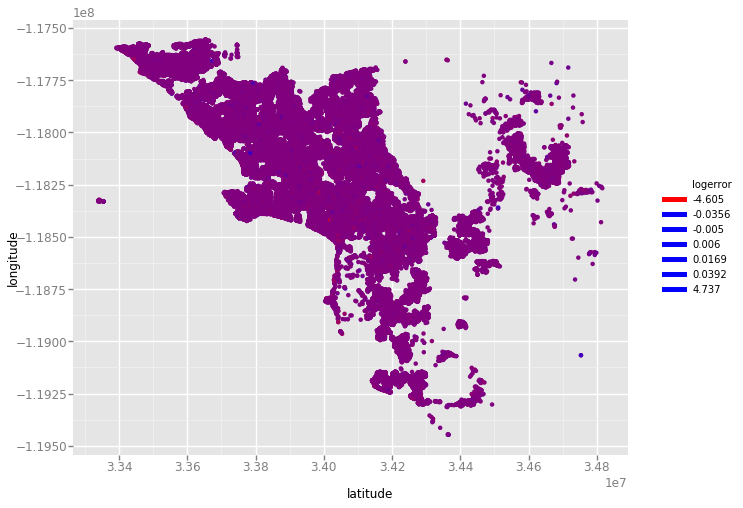

<ggplot: (342160220)>

In [217]:
ggplot(aes(x='latitude', y='longitude', color='logerror'), data=merged) + \
    geom_point() + scale_color_gradient(low = 'red', high = 'blue')

## lotsizesquarefeet VS logerror

In [102]:
merged["logerror"].describe()

count    90275.000000
mean         0.011457
std          0.161079
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64

In [95]:
merged["lotsizesquarefeet"].tail()

90270    93676.0
90271     9343.0
90272     6865.0
90273    20033.0
90274     5124.0
Name: lotsizesquarefeet, dtype: float64

In [99]:
merged["lotsizesquarefeet"].describe().reset_index()

,index,lotsizesquarefeet
0,count,8.012500e+04
1,mean,2.911016e+04
2,std,1.217213e+05
3,min,1.670000e+02
4,25%,5.703000e+03
5,50%,7.200000e+03
6,75%,1.168600e+04
7,max,6.971010e+06


In [270]:
# col = "lotsizesquarefeet"
# ulimit = np.percentile(merged[col].values, 99.5)
# llimit = np.percentile(merged[col].values, 0.5)
# merged[col].ix[merged[col] > ulimit] = ulimit
# merged[col].ix[merged[col] < llimit] = llimit

# plt.figure(figsize=(12,12))
# sns.jointplot(x =merged.lotsizesquarefeet.values, y =merged.logerror.values, size=10)
# plt.ylabel('Log Error', fontsize=12)
# plt.xlabel('lot size square feet', fontsize=12)
# plt.title("lot size square feet Vs Log error", fontsize=15)
# plt.show()

In [275]:
merged.lotsizesquarefeet.value_counts()

6000.0      1145
5000.0       474
7200.0       369
7000.0       353
6500.0       300
7500.0       269
6600.0       203
5500.0       173
6300.0       163
4000.0       155
4500.0       151
5200.0       150
5400.0       144
6750.0       138
8000.0       137
7499.0       124
6100.0       122
5100.0       116
8400.0       111
7700.0       110
6250.0       110
1742.0       102
7800.0       101
6200.0       100
3049.0        96
6001.0        96
4800.0        92
5999.0        89
2178.0        86
9000.0        84
            ... 
23259.0        1
10636.0        1
38396.0        1
22682.0        1
36018.0        1
1451.0         1
195296.0       1
18233.0        1
22641.0        1
26729.0        1
9899.0         1
5792.0         1
1656.0         1
13368.0        1
17301.0        1
38768.0        1
22639.0        1
16852.0        1
16376.0        1
18542.0        1
213865.0       1
2309.0         1
24125.0        1
2828.0         1
22635.0        1
20895.0        1
14291.0        1
4660.0        

In [277]:
merged.lotsizesquarefeet.describe().reset_index()

,index,lotsizesquarefeet
0,count,8.012500e+04
1,mean,2.911016e+04
2,std,1.217213e+05
3,min,1.670000e+02
4,25%,5.703000e+03
5,50%,7.200000e+03
6,75%,1.168600e+04
7,max,6.971010e+06


In [279]:
# sns.distplot(merged.lotsizesquarefeet.values, kde=True, rug=True)

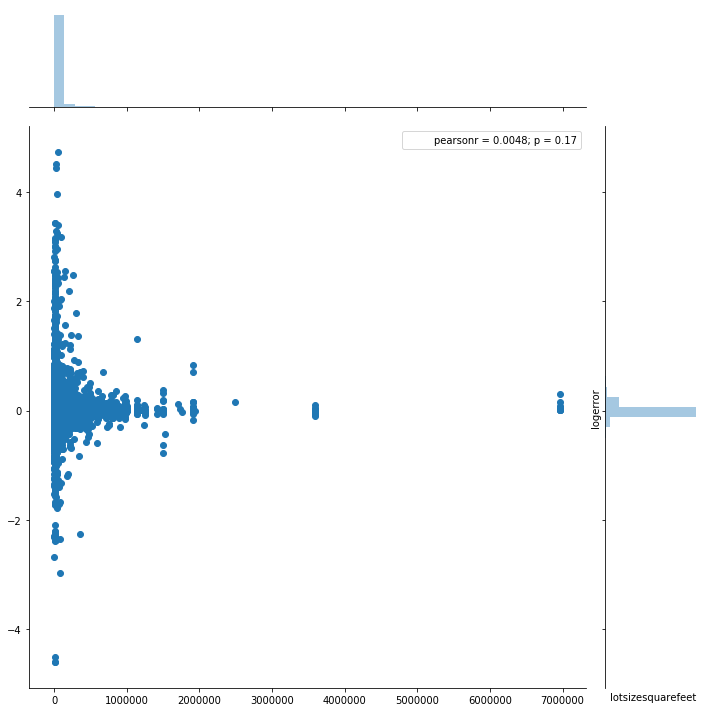

In [233]:
sns.jointplot(x =merged.lotsizesquarefeet.values,\
              y =merged.logerror.values,\
              size=10)
plt.xlabel("lotsizesquarefeet")
plt.ylabel("logerror")
plt.show()

## propertycountylandusecode VS logerror

In [150]:
merged["propertycountylandusecode"].head()

0    0100
1       1
2    0100
3    010C
4     122
Name: propertycountylandusecode, dtype: object

In [151]:
merged["propertycountylandusecode"].tail()

90270    010C
90271    0100
90272    0200
90273    010C
90274    0100
Name: propertycountylandusecode, dtype: object

In [264]:
merged["propertycountylandusecode"].value_counts()

0100    30846
122     15383
010C    10264
0101     7435
34       5946
1111     3883
1        2915
010E     2286
010D     2209
0200     2153
1129     1643
1110     1117
0400      747
0300      578
012C      523
1128      356
0104      348
01DC      251
010V      201
01HC      148
38        106
96        104
0103      100
010G       80
010H       72
010M       59
0700       54
1210       47
0108       46
1117       46
        ...  
1310        4
020G        4
0110        4
012D        4
105         4
0102        3
1012        2
1421        2
1432        2
030G        2
1011        2
0210        1
0131        1
0114        1
6050        1
0301        1
040A        1
1200        1
0130        1
01DD        1
0303        1
1333        1
010         1
1722        1
0           1
1420        1
8800        1
200         1
0111        1
020M        1
Name: propertycountylandusecode, Length: 77, dtype: int64

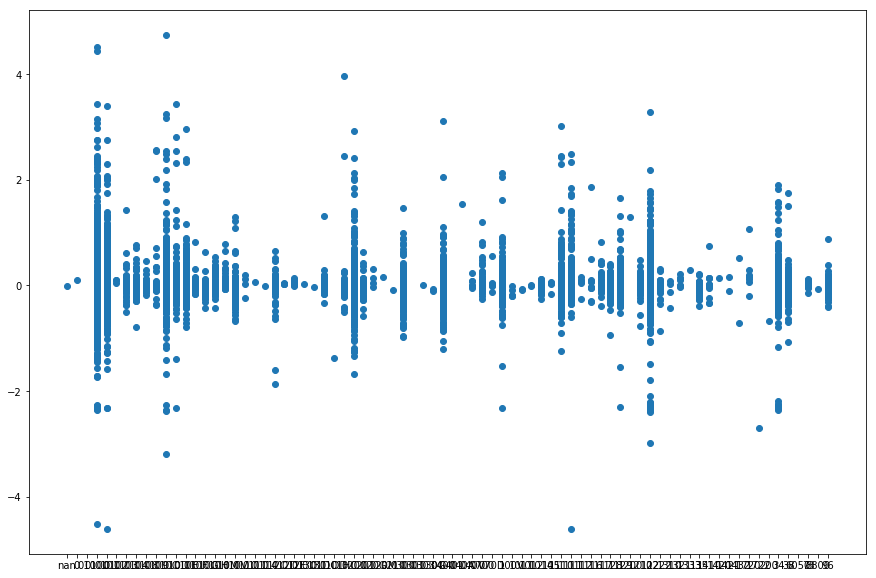

In [268]:
plt.figure(figsize=(15,10))
plt.scatter(x=merged.propertycountylandusecode,\
            y=merged.logerror)
plt.show()

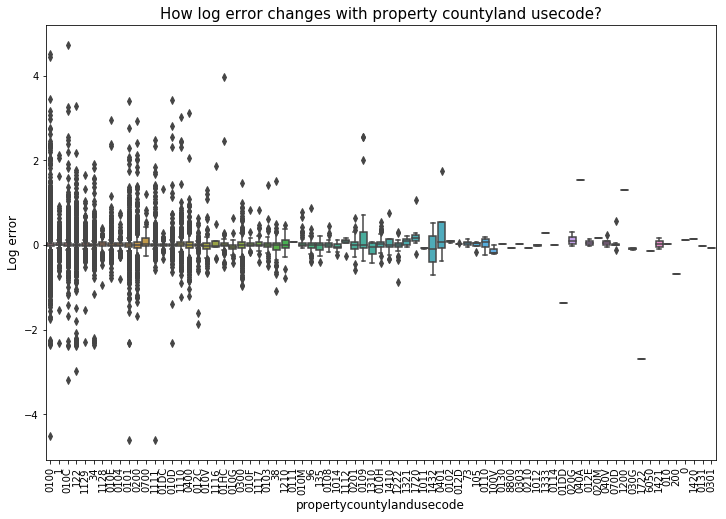

In [240]:
plt.figure(figsize=(12,8))
sns.boxplot(x="propertycountylandusecode", y="logerror", data=merged)
plt.ylabel('Log error', fontsize=12)
plt.xlabel('propertycountylandusecode', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("How log error changes with property countyland usecode?", fontsize=15)
plt.show()

## propertylandusetypeid VS logerror

In [161]:
merged["propertylandusetypeid"].value_counts()

261.0    60637
266.0    22815
246.0     2376
269.0     2334
248.0      879
247.0      629
265.0      356
263.0       84
260.0       62
275.0       46
267.0       28
31.0        17
264.0       11
47.0         1
Name: propertylandusetypeid, dtype: int64

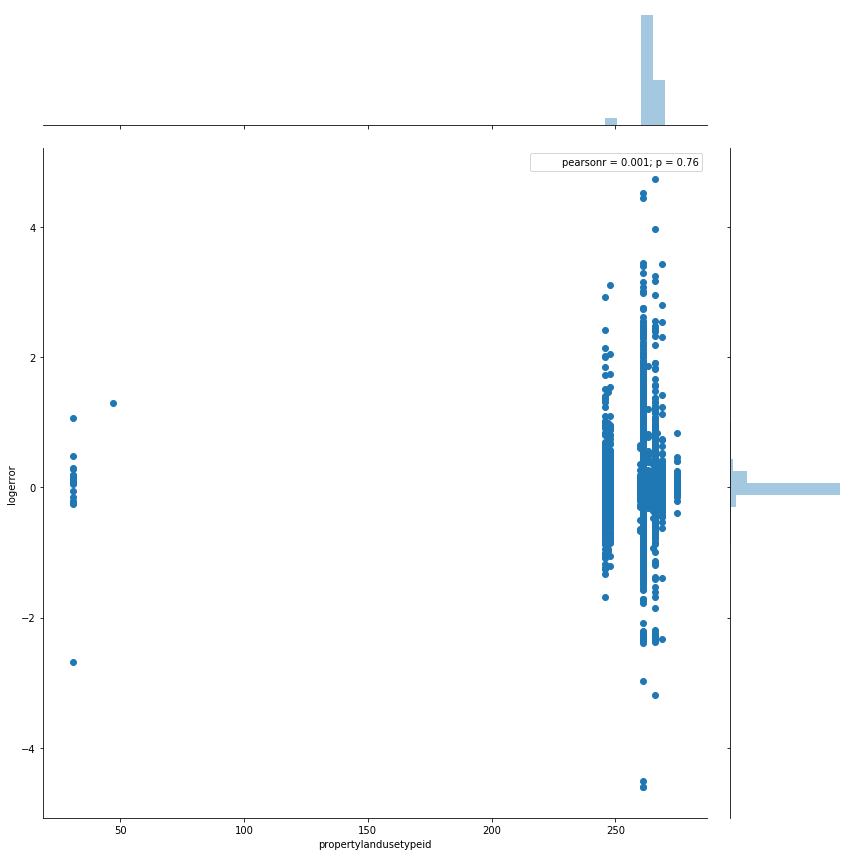

In [201]:
sns.jointplot(x =merged.propertylandusetypeid,\
              y =merged.logerror,\
              size=12)
plt.show()

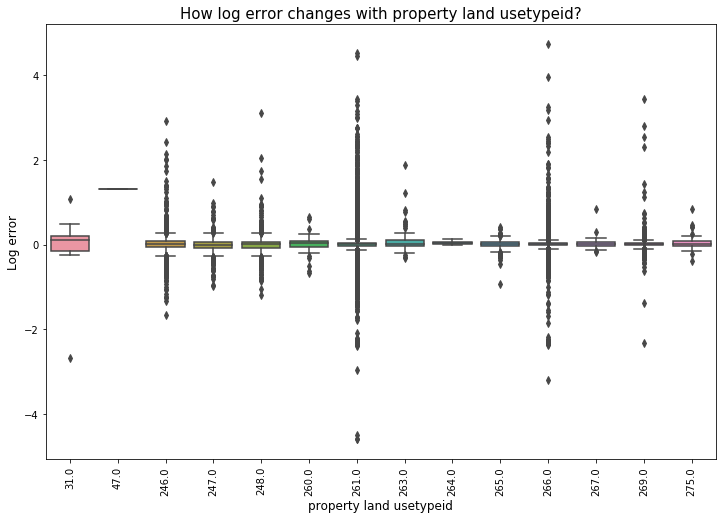

In [203]:
plt.figure(figsize=(12,8))
sns.boxplot(x="propertylandusetypeid", y="logerror", data=merged)
plt.ylabel('Log error', fontsize=12)
plt.xlabel('property land usetypeid', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("How log error changes with property land usetypeid?", fontsize=15)
plt.show()

## rawcensustractandblock VS logerror

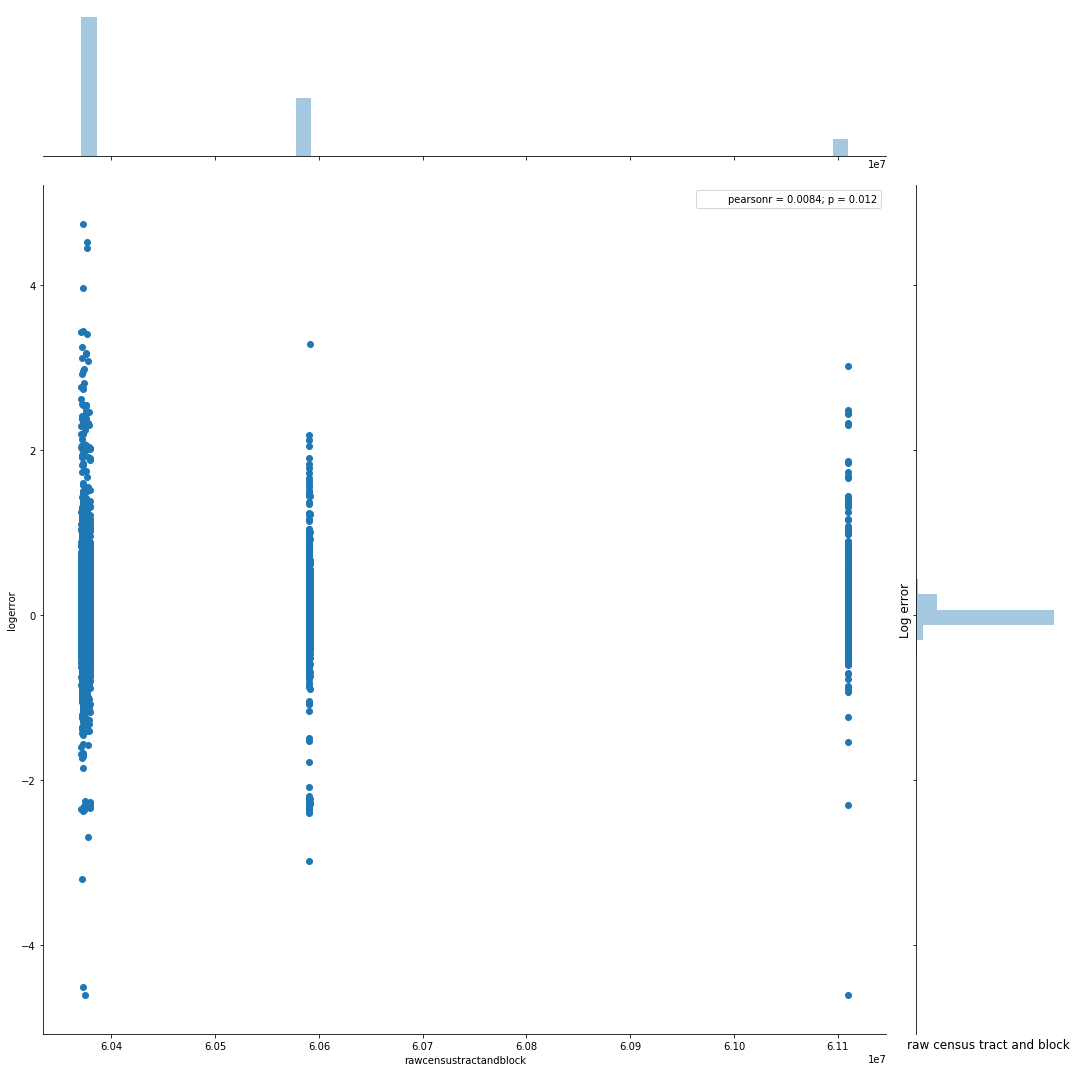

In [259]:
sns.jointplot(x=merged["rawcensustractandblock"],\
              y=merged["logerror"],\
              size=15)
plt.xlabel('raw census tract and block', fontsize=12)
plt.ylabel('Log error', fontsize=12)
plt.show()

## regionidcity VS logerror

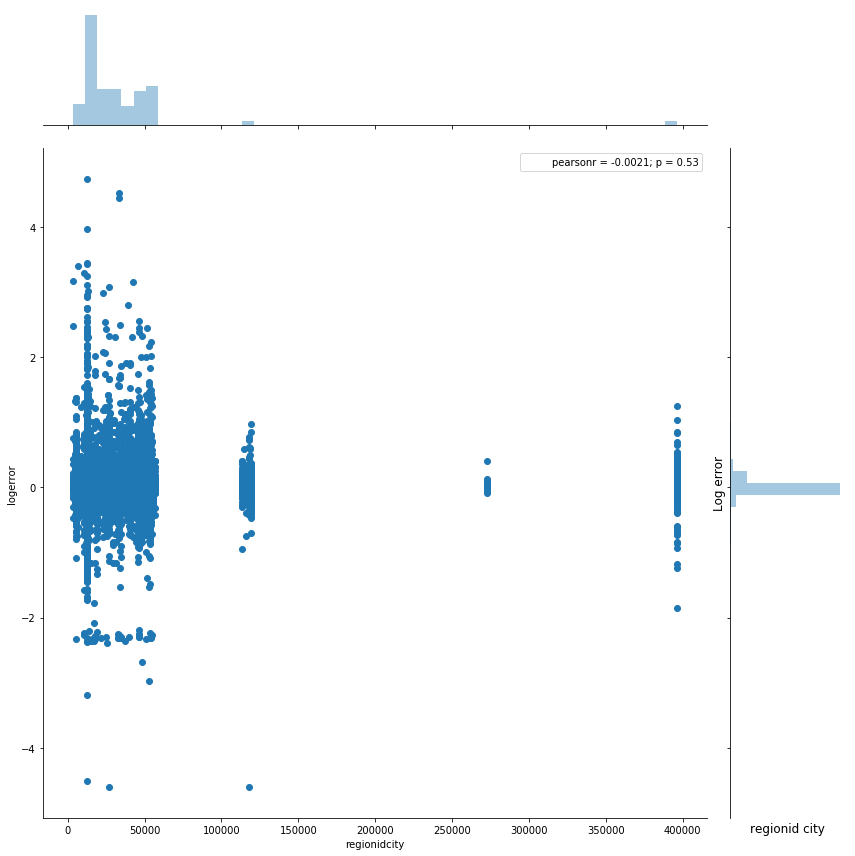

In [261]:
sns.jointplot(x=merged["regionidcity"],\
              y=merged["logerror"],\
              size=12)
plt.xlabel('regionid city', fontsize=12)
plt.ylabel('Log error', fontsize=12)
plt.show()

## regionidcounty VS logerror

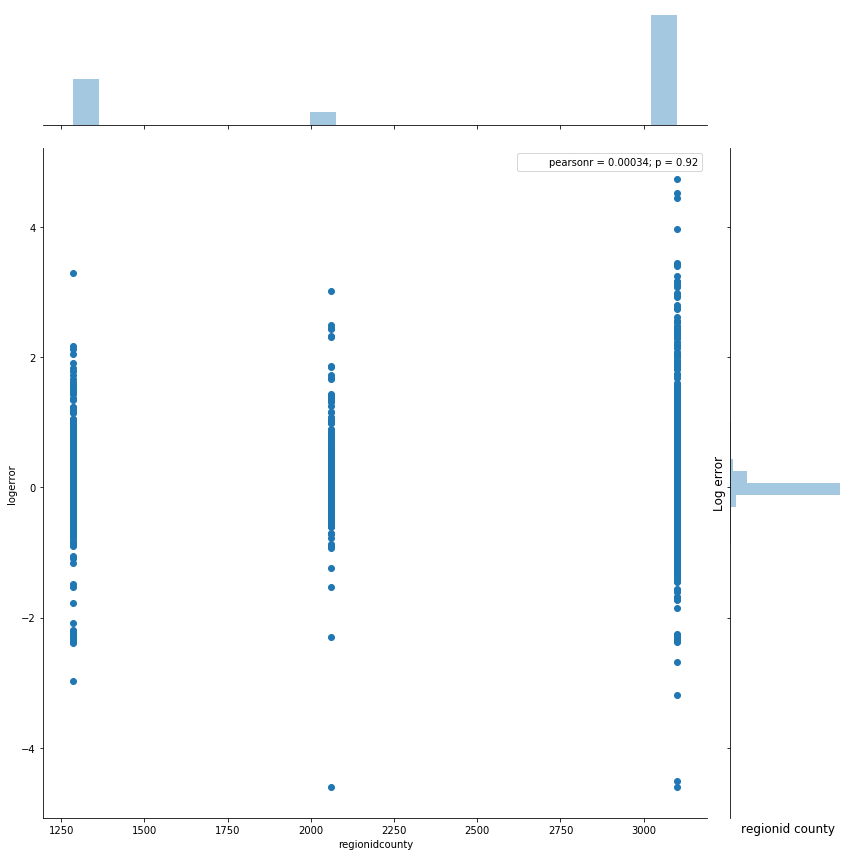

In [263]:
sns.jointplot(x=merged["regionidcounty"],\
              y=merged["logerror"],\
              size=12)
plt.xlabel('regionid county', fontsize=12)
plt.ylabel('Log error', fontsize=12)
plt.show()

## regionidcounty & regionidcity

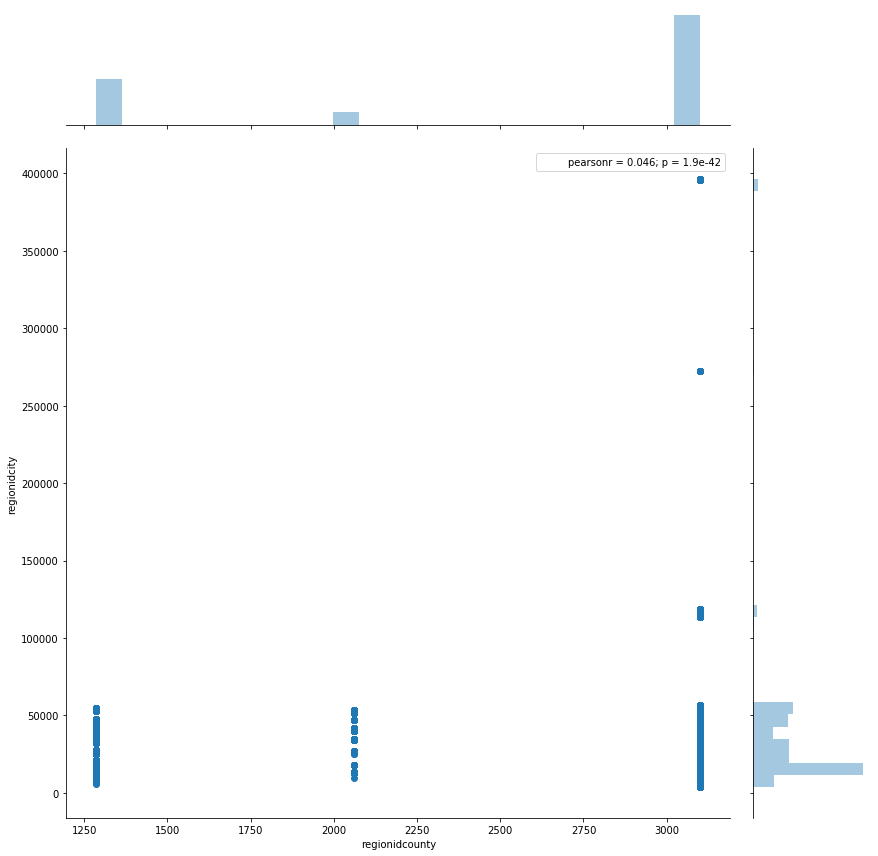

In [257]:
sns.jointplot(x=merged["regionidcounty"],\
              y=merged["regionidcity"],\
              size=12)
plt.show()

## regionidzip VS logerror

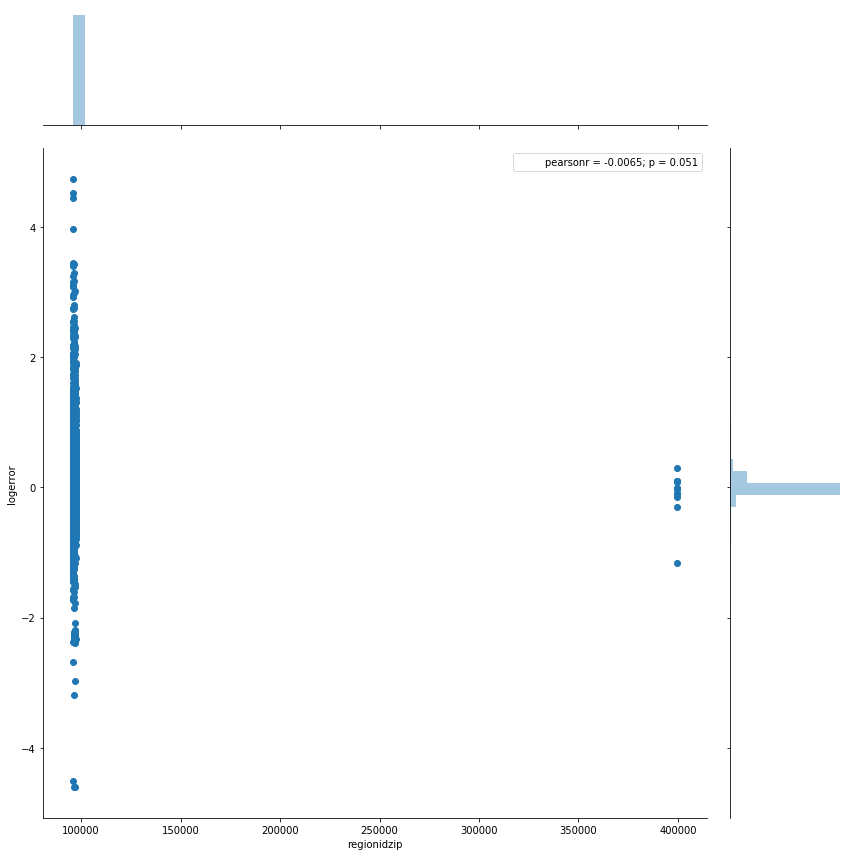

In [256]:
sns.jointplot(x=merged["regionidzip"],\
              y=merged["logerror"],\
              size=12)
plt.show()